In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import plotly.express as px

In [33]:
def load_and_concatenate_files(pattern):
    files = glob.glob(pattern)
    if not files:
        raise ValueError(f"No files found for pattern {pattern}")
    df_list = [pd.read_csv(file) for file in files]
    concatenated_df = pd.concat(df_list, ignore_index=True)
    return concatenated_df

In [34]:
print(glob.glob('data_set_1/googlelead-performance*.csv'))
print(glob.glob('data_set_1/metaads-performance*.csv'))
print(glob.glob('data_set_1/microsoftads-performance*.csv'))
print(glob.glob('data_set_1/website-landings*.csv'))


[]
['data_set_1\\metaads-performance.csv']
['data_set_1\\microsoftads-performance.csv']
['data_set_1\\website-landings.csv']


In [35]:
# Load data from the first set of files
google_data_set1 = load_and_concatenate_files('data_set_1/googleads-performance*.csv')
meta_data_set1 = load_and_concatenate_files('data_set_1/metaads-performance*.csv')
microsoft_data_set1 = load_and_concatenate_files('data_set_1/microsoftads-performance*.csv')
website_data_set1 = load_and_concatenate_files('data_set_1/website-landings*.csv')

# Load data from the second set of files
google_data_set2 = load_and_concatenate_files('data_set_2/googleads-performance*.csv')
meta_data_set2 = load_and_concatenate_files('data_set_2/metaads-performance*.csv')
microsoft_data_set2 = load_and_concatenate_files('data_set_2/microsoftads-performance*.csv')
website_data_set2 = load_and_concatenate_files('data_set_2/website-landings*.csv')

# Concatenate the two sets of data
google_data = pd.concat([google_data_set1, google_data_set2], ignore_index=True)
meta_data = pd.concat([meta_data_set1, meta_data_set2], ignore_index=True)
microsoft_data = pd.concat([microsoft_data_set1, microsoft_data_set2], ignore_index=True)
website_data = pd.concat([website_data_set1, website_data_set2], ignore_index=True)


In [36]:
# Verify the combined data
print(google_data.info())
print(meta_data.info())
print(microsoft_data.info())
print(website_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1184 non-null   object 
 1   Campaign type  1184 non-null   object 
 2   Impressions    1184 non-null   float64
 3   Clicks         1184 non-null   float64
 4   Cost           1184 non-null   float64
 5   Conversions    1184 non-null   float64
 6   Revenue        1184 non-null   float64
dtypes: float64(5), object(2)
memory usage: 64.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         364 non-null    object 
 1   Impressions  364 non-null    float64
 2   Reach        364 non-null    float64
 3   Cost         364 non-null    float64
 4   Clicks       364 non-null    float64
 5   Conversions  364 non-null    float64


In [37]:
print(google_data.head())
print(meta_data.head())
print(microsoft_data.head())
print(website_data.head())

         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  
         Date  Impressions    Reach   Cost  Clicks  Conversions  Revenue
0  2024-01-01      36034.0  27263.0  209.1   608.0          4.0    158.2
1  2024-01-02      30804.0  22648.0  204.9   516.0         11.0   1412.8
2  2024-01-03      26372.0  18947.0  198.7   429.0          4.0    371.5
3  2024-01-04      17354.0  11436.0  131.2   324.0          4.0      0.0
4  2024-01-05      12036.0   7921.0  114.0   224.0          2.0      0.0
         Date     Campaign 

In [63]:
# Convert date columns to datetime
google_data['Date'] = pd.to_datetime(google_data['Date'])
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
microsoft_data['Date'] = pd.to_datetime(microsoft_data['Date'])
website_data['Website Landing Time'] = pd.to_datetime(website_data['Website Landing Time'])

# Fill missing values if necessary
google_data.fillna(0, inplace=True)
meta_data.fillna(0, inplace=True)
microsoft_data.fillna(0, inplace=True)
website_data.fillna(0, inplace=True)

In [64]:
# Replace any infinite or NaN values with 0
google_data.replace([np.inf, -np.inf], np.nan, inplace=True)
meta_data.replace([np.inf, -np.inf], np.nan, inplace=True)
microsoft_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define the imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Impute missing values for each dataset
google_data[features] = imputer.fit_transform(google_data[features])
meta_data[features] = imputer.fit_transform(meta_data[features])
microsoft_data[features] = imputer.fit_transform(microsoft_data[features])

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
google_data[features] = scaler.fit_transform(google_data[features])
meta_data[features] = scaler.transform(meta_data[features])
microsoft_data[features] = scaler.transform(microsoft_data[features])


In [67]:
print(google_data.columns)
print(meta_data.columns)
print(microsoft_data.columns)


Index(['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions',
       'Revenue', 'CTR', 'Predicted_Conversions', 'Budget_Allocation'],
      dtype='object')
Index(['Date', 'Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions',
       'Revenue', 'CTR', 'Predicted_Conversions', 'Budget_Allocation'],
      dtype='object')
Index(['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions',
       'Revenue', 'CTR', 'Predicted_Conversions', 'Budget_Allocation'],
      dtype='object')


C:\Users\digvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\digvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\digvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\digvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\digvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

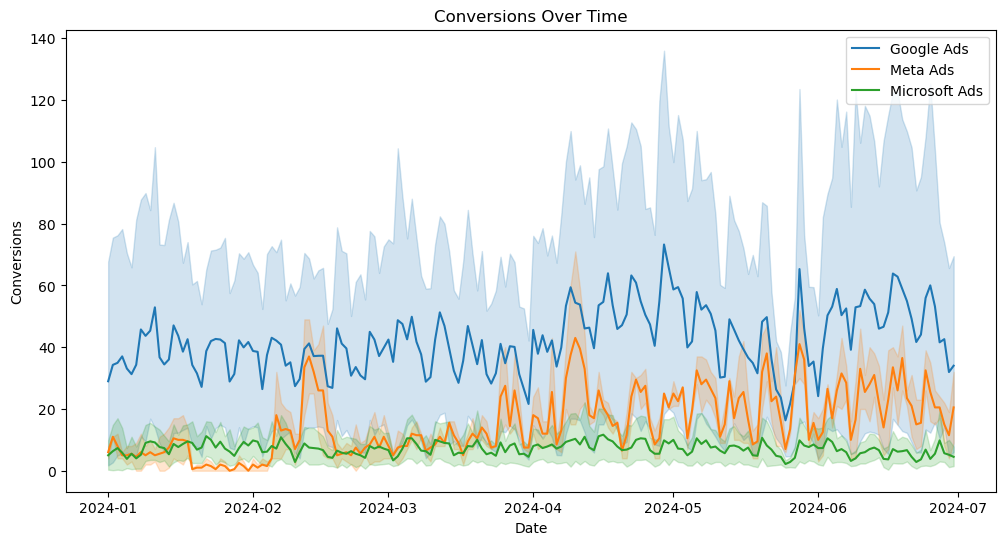

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=google_data, x='Date', y='Conversions', label='Google Ads')
sns.lineplot(data=meta_data, x='Date', y='Conversions', label='Meta Ads')
sns.lineplot(data=microsoft_data, x='Date', y='Conversions', label='Microsoft Ads')
plt.legend()
plt.title('Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.show()


In [69]:
print(website_data.columns)

Index(['User Id', 'Website Landing Time', 'Is Converted', 'Source', 'Channel',
       'Campaign Type'],
      dtype='object')


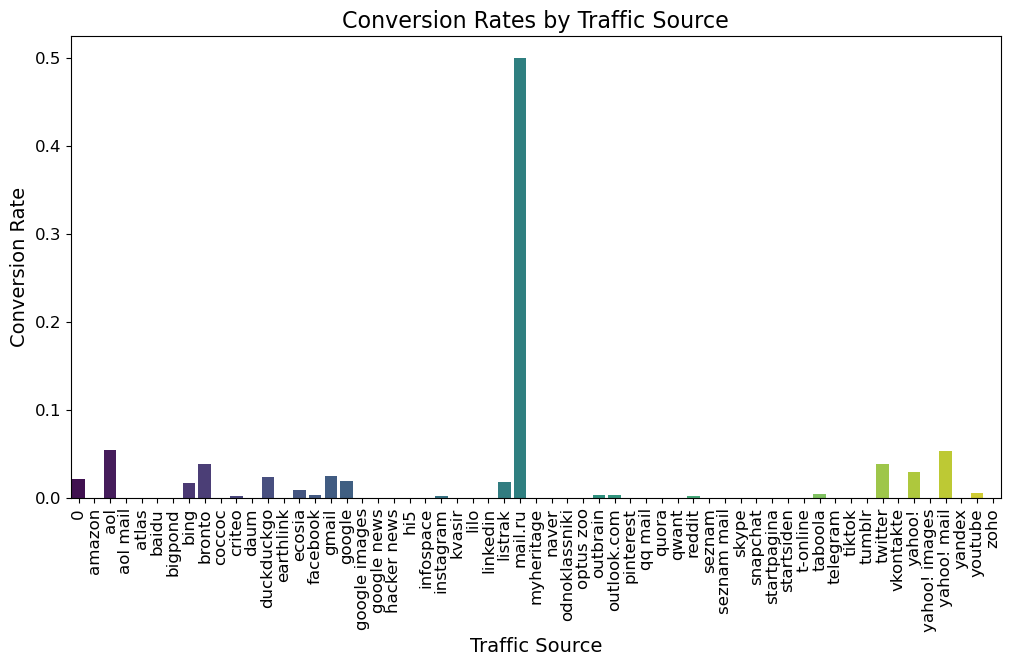

In [70]:
# Calculate conversion rates by Source
conversion_rates = website_data.groupby('Source')['Is Converted'].mean().reset_index()

# Plot the conversion rates
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_rates, x='Source', y='Is Converted', palette='viridis')

# Add titles and labels
plt.title('Conversion Rates by Traffic Source', fontsize=16)
plt.xlabel('Traffic Source', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [71]:
# Feature Engineering: Adding CTR
google_data['CTR'] = google_data['Clicks'] / google_data['Impressions']
meta_data['CTR'] = meta_data['Clicks'] / meta_data['Impressions']
microsoft_data['CTR'] = microsoft_data['Clicks'] / microsoft_data['Impressions']

In [72]:
# Example of selected features
features = ['Impressions', 'Clicks', 'Cost', 'CTR']
target = 'Conversions'


In [73]:
# Preprocess data
def preprocess_data(X):
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    return pd.DataFrame(X_scaled, columns=X.columns)

In [74]:
# Split and preprocess Google data
X_google = preprocess_data(google_data[features])
y_google = google_data[target]
X_train_google, X_test_google, y_train_google, y_test_google = train_test_split(X_google, y_google, test_size=0.2, random_state=42)

# Split and preprocess Meta data
X_meta = preprocess_data(meta_data[features])
y_meta = meta_data[target]
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.2, random_state=42)

# Split and preprocess Microsoft data
X_microsoft = preprocess_data(microsoft_data[features])
y_microsoft = microsoft_data[target]
X_train_microsoft, X_test_microsoft, y_train_microsoft, y_test_microsoft = train_test_split(X_microsoft, y_microsoft, test_size=0.2, random_state=42)


In [75]:
# Model training and evaluation
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

In [92]:
# Hyperparameter tuning with GridSearchCV for Google data
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Google data
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_google, y_train_google)
best_rf_google = grid_search.best_estimator_

# Cross-validation scores for Google model
cv_scores_google = cross_val_score(best_rf_google, X_train_google, y_train_google, cv=5)
print(f'Mean CV Score for Google: {np.mean(cv_scores_google)}')

# Initialize GridSearchCV for Meta data
rf_meta = RandomForestRegressor(random_state=42)
grid_search_meta = GridSearchCV(estimator=rf_meta, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_meta.fit(X_train_meta, y_train_meta)
best_rf_meta = grid_search_meta.best_estimator_

# Cross-validation scores for Meta model
cv_scores_meta = cross_val_score(best_rf_meta, X_train_meta, y_train_meta, cv=5)
print(f'Mean CV Score for Meta: {np.mean(cv_scores_meta)}')

# Initialize GridSearchCV for Microsoft data
rf_microsoft = RandomForestRegressor(random_state=42)
grid_search_microsoft = GridSearchCV(estimator=rf_microsoft, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_microsoft.fit(X_train_microsoft, y_train_microsoft)
best_rf_microsoft = grid_search_microsoft.best_estimator_

# Cross-validation scores for Microsoft model
cv_scores_microsoft = cross_val_score(best_rf_microsoft, X_train_microsoft, y_train_microsoft, cv=5)
print(f'Mean CV Score for Microsoft: {np.mean(cv_scores_microsoft)}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mean CV Score for Google: 0.9276289811789603
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mean CV Score for Meta: 0.021427193193033035
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mean CV Score for Microsoft: 0.7411738648482338


In [93]:
# Training and evaluating the models
google_model, google_mse, google_r2 = train_and_evaluate(X_train_google, y_train_google, X_test_google, y_test_google)
meta_model, meta_mse, meta_r2 = train_and_evaluate(X_train_meta, y_train_meta, X_test_meta, y_test_meta)
microsoft_model, microsoft_mse, microsoft_r2 = train_and_evaluate(X_train_microsoft, y_train_microsoft, X_test_microsoft, y_test_microsoft)

In [94]:
print(f'Google Model - MSE: {google_mse}, R2: {google_r2}')
print(f'Meta Model - MSE: {meta_mse}, R2: {meta_r2}')
print(f'Microsoft Model - MSE: {microsoft_mse}, R2: {microsoft_r2}')

Google Model - MSE: 135.15113856962026, R2: 0.9367925478742686
Meta Model - MSE: 138.8456904109589, R2: 0.09951722787459838
Microsoft Model - MSE: 17.745533640553, R2: 0.6924645129378304


In [97]:
xgboost_model = GradientBoostingRegressor()
gbr_model = GradientBoostingRegressor()

# For Meta data
ensemble_meta = VotingRegressor([('rf', best_rf_meta), ('xgb', xgboost_model), ('gbr', gbr_model)])
ensemble_meta.fit(X_train_meta, y_train_meta)

# For Microsoft data
ensemble_microsoft = VotingRegressor([('rf', best_rf_microsoft), ('xgb', xgboost_model), ('gbr', gbr_model)])
ensemble_microsoft.fit(X_train_microsoft, y_train_microsoft)

# For Google data
ensemble_google = VotingRegressor([('rf', best_rf_google), ('xgb', xgboost_model), ('gbr', gbr_model)])
ensemble_google.fit(X_train_google, y_train_google)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_split=10,
                                                   n_estimators=200,
                                                   random_state=42)),
                            ('xgb', GradientBoostingRegressor()),
                            ('gbr', GradientBoostingRegressor())])

In [98]:
# Budget allocation
def allocate_budget(model, data, budget):
    imputer = SimpleImputer(strategy='mean')
    data_imputed = imputer.fit_transform(data[features])
    data_imputed = pd.DataFrame(data_imputed, columns=features)
    data['Predicted_Conversions'] = model.predict(data_imputed)
    total_cost = data['Cost'].sum()
    data['Budget_Allocation'] = (data['Cost'] / total_cost) * budget
    return data[['Date', 'Budget_Allocation', 'Predicted_Conversions']]

# Example allocation for Google Ads
google_budget_allocation = allocate_budget(ensemble_model, google_data, 200000)
print(google_budget_allocation)

# Example allocation for Meta Ads
meta_budget_allocation = allocate_budget(meta_model, meta_data, 200000)
print(meta_budget_allocation)

# Example allocation for Microsoft Ads
microsoft_budget_allocation = allocate_budget(microsoft_model, microsoft_data, 200000)
print(microsoft_budget_allocation)


           Date  Budget_Allocation  Predicted_Conversions
0    2024-01-01       6.218226e+17              83.303390
1    2024-01-01       1.466668e+18              -2.570852
2    2024-01-01       8.275308e+17              11.764215
3    2024-01-01       1.318373e+18              -2.245482
4    2024-01-02      -4.964423e+17              88.387013
...         ...                ...                    ...
1179 2024-06-28       7.120613e+17              68.361354
1180 2024-06-29      -4.646464e+17              94.729649
1181 2024-06-29       6.160298e+17              67.803603
1182 2024-06-30      -7.528696e+17             116.801348
1183 2024-06-30       6.305762e+17              69.006120

[1184 rows x 3 columns]
          Date  Budget_Allocation  Predicted_Conversions
0   2024-01-01         498.507400                  28.53
1   2024-01-02         500.758120                  27.26
2   2024-01-03         504.080611                  27.44
3   2024-01-04         540.252896                  

C:\Users\digvi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



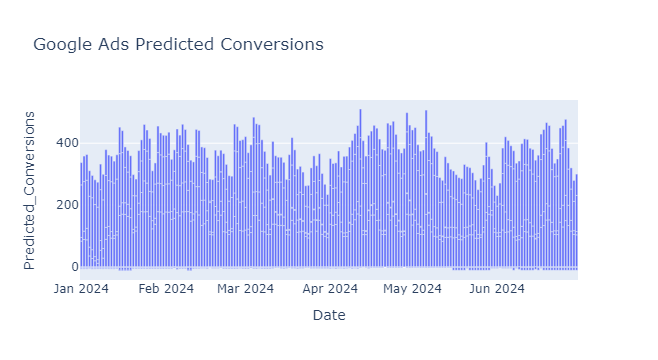

C:\Users\digvi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



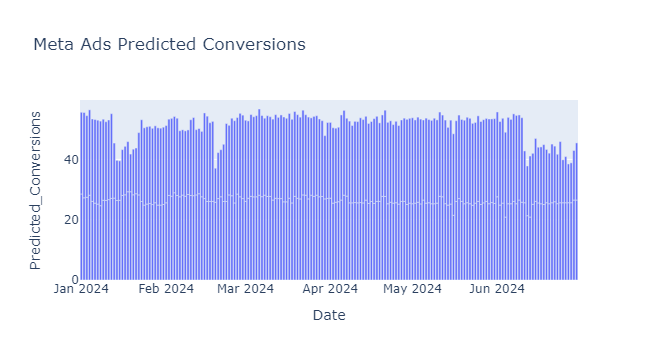

C:\Users\digvi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



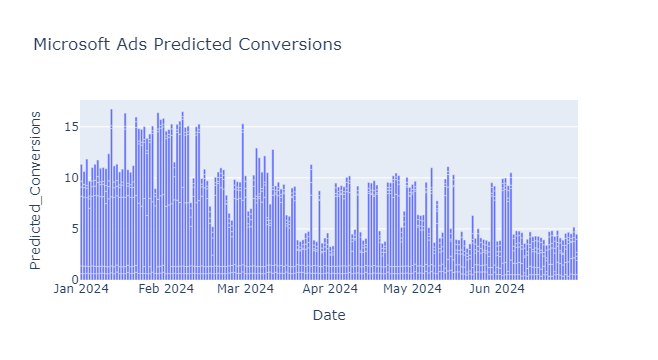

In [99]:
def compare_conversions(data, title):
    fig = px.bar(data, x='Date', y='Predicted_Conversions', title=title)
    fig.show()

compare_conversions(google_budget_allocation, 'Google Ads Predicted Conversions')
compare_conversions(meta_budget_allocation, 'Meta Ads Predicted Conversions')
compare_conversions(microsoft_budget_allocation, 'Microsoft Ads Predicted Conversions')

In [100]:
# Replace any infinite or NaN values with 0
google_data.replace([np.inf, -np.inf], np.nan, inplace=True)
meta_data.replace([np.inf, -np.inf], np.nan, inplace=True)
microsoft_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define the imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Impute missing values for each dataset
google_data[features] = imputer.fit_transform(google_data[features])
meta_data[features] = imputer.fit_transform(meta_data[features])
microsoft_data[features] = imputer.fit_transform(microsoft_data[features])

In [104]:
# Define the objective function (to maximize conversions)
def objective_function(weights, models, data):
    total_conversions = 0
    for i, model in enumerate(models):
        X = data[i][features]
        predicted_conversions = model.predict(X) * weights[i]
        total_conversions += np.sum(predicted_conversions)
    return -total_conversions  # Minimize negative conversions

# Define constraints
constraints = [
    {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Sum of weights should be 1
    {'type': 'ineq', 'fun': lambda w: w[0] - 0.1},  # Google budget >= 10% of total budget
    {'type': 'ineq', 'fun': lambda w: w[1] - 0.1},  # Meta budget >= 10% of total budget
    {'type': 'ineq', 'fun': lambda w: w[2] - 0.1},  # Microsoft budget >= 10% of total budget
]

# Initial weights
weights_initial = np.array([1/3, 1/3, 1/3])

# Optimize the allocation
result = minimize(objective_function, weights_initial, args=([google_model, meta_model, microsoft_model], [google_data, meta_data, microsoft_data]), constraints=constraints, bounds=[(0, 1)]*3)

# Extract optimized weights
optimized_weights = result.x
print(f'Optimized Weights: {optimized_weights}')

Optimized Weights: [0.82541487 0.08968651 0.08489862]


In [105]:
# Total budget
total_budget = 200000
# Normalize the weights so they sum to 1
weights = np.array(optimized_weights)
normalized_weights = weights / np.sum(weights)

# Allocate the budget based on the optimized weights
google_budget = optimized_weights[0] * total_budget
meta_budget = optimized_weights[1] * total_budget
microsoft_budget = optimized_weights[2] * total_budget

# Display the budget allocation
print(f'Google Budget Allocation: ${google_budget:.2f}')
print(f'Meta Budget Allocation: ${meta_budget:.2f}')
print(f'Microsoft Budget Allocation: ${microsoft_budget:.2f}')


Google Budget Allocation: $165082.97
Meta Budget Allocation: $17937.30
Microsoft Budget Allocation: $16979.72


In [106]:
total_allocation = google_budget + meta_budget + microsoft_budget
print(f'Total Allocation: ${total_allocation:.2f}')
print(f'Total Budget: ${total_budget:.2f}')

Total Allocation: $200000.00
Total Budget: $200000.00
